In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data = pd.read_csv('/Users/gost1/Desktop/Feature Engineering/Лекция 8/Архив_3/kobe.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [6]:
ind = data[data[target].isna()].index
ind

Int64Index([    0,     7,    16,    19,    32,    33,    34,    35,    36,
               37,
            ...
            30646, 30648, 30655, 30659, 30664, 30668, 30680, 30682, 30686,
            30693],
           dtype='int64', length=5000)

In [7]:
data.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [8]:
data.team_id.value_counts()

1610612747    30697
Name: team_id, dtype: int64

In [9]:
data.combined_shot_type.value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

In [10]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.037232,nan,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.001612,nan,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.148070,nan,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,nan,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.148070,nan,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000848,nan,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.028342,nan,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.032152,nan,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001257,nan,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.030804,nan,-0.004868


In [11]:
data.drop(['combined_shot_type', 'team_name', 'matchup', 'team_id', 'loc_x', 'loc_y', 'lat', 'lon' ], axis=1, inplace=True)

<AxesSubplot:xlabel='shot_type', ylabel='count'>

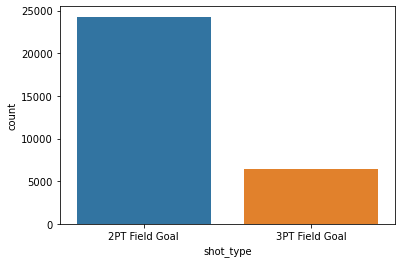

In [12]:
sns.countplot(data.shot_type)

<AxesSubplot:xlabel='minutes_remaining', ylabel='count'>

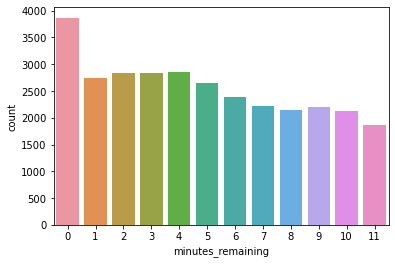

In [13]:
sns.countplot(data.minutes_remaining)

In [14]:
c = data.groupby('shot_distance')['shot_made_flag'].mean()

Text(0, 0.5, 'Mean(shot_made_flag)')

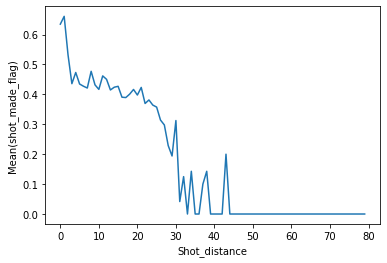

In [15]:
plt.plot(c.index, c.values)
plt.xlabel('Shot_distance')
plt.ylabel('Mean(shot_made_flag)')

In [16]:
c = pd.get_dummies(data.action_type)
data = pd.concat([data, c], axis=1)

In [17]:
c = pd.get_dummies(data.shot_type)
data = pd.concat([data, c], axis=1)

In [18]:
c = pd.get_dummies(data.shot_zone_area)
data = pd.concat([data, c], axis=1)

In [19]:
c = pd.get_dummies(data.shot_zone_basic)
data = pd.concat([data, c], axis=1)

In [20]:
c = pd.get_dummies(data.shot_zone_range)
data = pd.concat([data, c], axis=1)

In [21]:
c = pd.get_dummies(data.opponent)
data = pd.concat([data, c], axis=1)

In [22]:
data.drop(['action_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range'], axis=1, inplace=True)

In [23]:
def get_value(X, column, mode='Logist', value=0, columns_for_reg=None):   
    if mode == 'Logist':  
        if columns_for_reg is None:
            cols = list(X.select_dtypes([np.number]).columns) 
            cols.remove(column)
        else:
            cols = columns_for_reg
        X_tmp = X.dropna()  
        m = LogisticRegression().fit(X_tmp[cols], X_tmp[column])
        X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
    return X.head(3)

In [24]:
get_value(data, 'shot_made_flag', mode='Logist', 
          columns_for_reg=['game_event_id',
 'game_id',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_id',
 'Alley Oop Dunk Shot',
 'Alley Oop Layup shot',
 'Cutting Finger Roll Layup Shot',
 'Cutting Layup Shot',
 'Driving Bank shot',
 'Driving Dunk Shot',
 'Driving Finger Roll Layup Shot',
 'Driving Finger Roll Shot',
 'Driving Floating Bank Jump Shot',
 'Driving Floating Jump Shot',
 'Driving Hook Shot',
 'Driving Jump shot',
 'Driving Layup Shot',
 'Driving Reverse Layup Shot',
 'Driving Slam Dunk Shot',
 'Dunk Shot',
 'Fadeaway Bank shot',
 'Fadeaway Jump Shot',
 'Finger Roll Layup Shot',
 'Finger Roll Shot',
 'Floating Jump shot',
 'Follow Up Dunk Shot',
 'Hook Bank Shot',
 'Hook Shot',
 'Jump Bank Shot',
 'Jump Hook Shot',
 'Jump Shot',
 'Layup Shot',
 'Pullup Bank shot',
 'Pullup Jump shot',
 'Putback Dunk Shot',
 'Putback Layup Shot',
 'Putback Slam Dunk Shot',
 'Reverse Dunk Shot',
 'Reverse Layup Shot',
 'Reverse Slam Dunk Shot',
 'Running Bank shot',
 'Running Dunk Shot',
 'Running Finger Roll Layup Shot',
 'Running Finger Roll Shot',
 'Running Hook Shot',
 'Running Jump Shot',
 'Running Layup Shot',
 'Running Pull-Up Jump Shot',
 'Running Reverse Layup Shot',
 'Running Slam Dunk Shot',
 'Running Tip Shot',
 'Slam Dunk Shot',
 'Step Back Jump shot',
 'Tip Layup Shot',
 'Tip Shot',
 'Turnaround Bank shot',
 'Turnaround Fadeaway Bank Jump Shot',
 'Turnaround Fadeaway shot',
 'Turnaround Finger Roll Shot',
 'Turnaround Hook Shot',
 'Turnaround Jump Shot',
 '2PT Field Goal',
 '3PT Field Goal',
 'Back Court(BC)',
 'Center(C)',
 'Left Side Center(LC)',
 'Left Side(L)',
 'Right Side Center(RC)',
 'Right Side(R)',
 'Above the Break 3',
 'Backcourt',
 'In The Paint (Non-RA)',
 'Left Corner 3',
 'Mid-Range',
 'Restricted Area',
 'Right Corner 3',
 '16-24 ft.',
 '24+ ft.',
 '8-16 ft.',
 'Back Court Shot',
 'Less Than 8 ft.',
 'ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS'])

,game_event_id,game_id,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,game_date,...,PHI,PHX,POR,SAC,SAS,SEA,TOR,UTA,VAN,WAS
0,10,20000012,10,1,0,2000-01,27,18,0.0,2000-10-31,...,0,0,1,0,0,0,0,0,0,0
1,12,20000012,10,1,0,2000-01,22,15,0.0,2000-10-31,...,0,0,1,0,0,0,0,0,0,0
2,35,20000012,7,1,0,2000-01,45,16,1.0,2000-10-31,...,0,0,1,0,0,0,0,0,0,0


In [25]:
data.shot_made_flag.value_counts()

0.0    19232
1.0    11465
Name: shot_made_flag, dtype: int64

In [26]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [27]:
X = data [['game_event_id',
 'game_id',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_id',
 'Alley Oop Dunk Shot',
 'Alley Oop Layup shot',
 'Cutting Finger Roll Layup Shot',
 'Cutting Layup Shot',
 'Driving Bank shot',
 'Driving Dunk Shot',
 'Driving Finger Roll Layup Shot',
 'Driving Finger Roll Shot',
 'Driving Floating Bank Jump Shot',
 'Driving Floating Jump Shot',
 'Driving Hook Shot',
 'Driving Jump shot',
 'Driving Layup Shot',
 'Driving Reverse Layup Shot',
 'Driving Slam Dunk Shot',
 'Dunk Shot',
 'Fadeaway Bank shot',
 'Fadeaway Jump Shot',
 'Finger Roll Layup Shot',
 'Finger Roll Shot',
 'Floating Jump shot',
 'Follow Up Dunk Shot',
 'Hook Bank Shot',
 'Hook Shot',
 'Jump Bank Shot',
 'Jump Hook Shot',
 'Jump Shot',
 'Layup Shot',
 'Pullup Bank shot',
 'Pullup Jump shot',
 'Putback Dunk Shot',
 'Putback Layup Shot',
 'Putback Slam Dunk Shot',
 'Reverse Dunk Shot',
 'Reverse Layup Shot',
 'Reverse Slam Dunk Shot',
 'Running Bank shot',
 'Running Dunk Shot',
 'Running Finger Roll Layup Shot',
 'Running Finger Roll Shot',
 'Running Hook Shot',
 'Running Jump Shot',
 'Running Layup Shot',
 'Running Pull-Up Jump Shot',
 'Running Reverse Layup Shot',
 'Running Slam Dunk Shot',
 'Running Tip Shot',
 'Slam Dunk Shot',
 'Step Back Jump shot',
 'Tip Layup Shot',
 'Tip Shot',
 'Turnaround Bank shot',
 'Turnaround Fadeaway Bank Jump Shot',
 'Turnaround Fadeaway shot',
 'Turnaround Finger Roll Shot',
 'Turnaround Hook Shot',
 'Turnaround Jump Shot',
 '2PT Field Goal',
 '3PT Field Goal',
 'Back Court(BC)',
 'Center(C)',
 'Left Side Center(LC)',
 'Left Side(L)',
 'Right Side Center(RC)',
 'Right Side(R)',
 'Above the Break 3',
 'Backcourt',
 'In The Paint (Non-RA)',
 'Left Corner 3',
 'Mid-Range',
 'Restricted Area',
 'Right Corner 3',
 '16-24 ft.',
 '24+ ft.',
 '8-16 ft.',
 'Back Court Shot',
 'Less Than 8 ft.',
 'ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS']]
y = data['shot_made_flag']

In [28]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.85, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

sc.fit(x_tr)
X_tr = sc.transform(x_tr)
X_ts = sc.transform(x_ts)

In [33]:
lg_r,lg_l,pred_r,pred_l = [], [], [], []
list_r=list(1.5**np.linspace(-20,20,100))
list_l=list(2**np.linspace(-20,20,100))

In [34]:
for i in range(len(list_r)):
    m_r = Ridge(alpha=list_r[i]).fit(X_tr, y_tr)
    m_l = Lasso(alpha=list_l[i]).fit(X_tr, y_tr)
    lg_r.append(m_r)
    pred_r.append(m_r.coef_)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

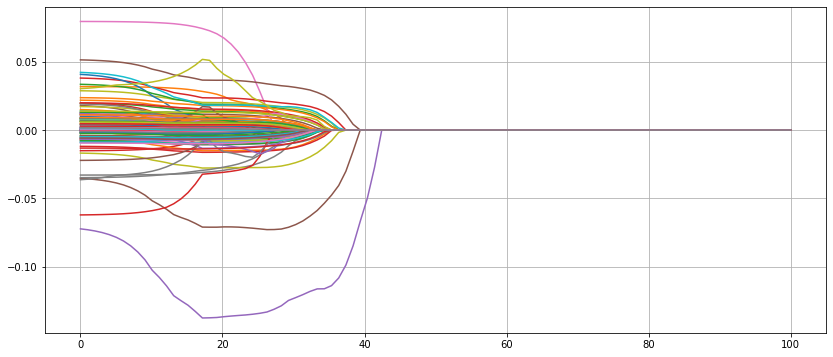

In [35]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))  
plt.grid() 

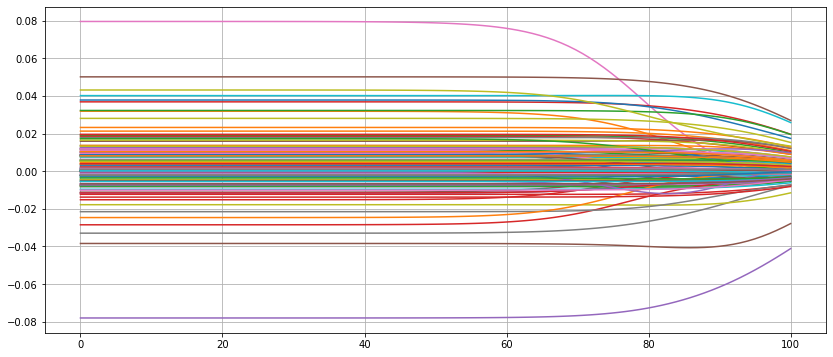

In [36]:
plt.figure(figsize=[14,6])
x_r = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_r,np.sign(i)*np.abs(i))  
plt.grid() 

## Вывод: видим, что Lasso быстрее занижает коэффициенты признаков